<a href="https://colab.research.google.com/github/manishramamoorthy/DataScience-Projects/blob/main/Project_3_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content of Loan Status Prediction :**
1) Importing Libraries         
2) Load a DataSet           
3) Data PreProcessing           

    ->1) Top Five Rows of DataSet             
    ->2) Last Five Rows of DataSet                            
    ->3) Shape of a DataSet                                       
    ->4) Data Types                                             
    ->5) Information of DataSet                      
    ->6) Checking Missing Values of DataSet                            
    ->7) Droping Duplicates Values of Dataset

4) EDA (Exploratory Data Analysis)

    ->1)Statistical Measures
    ->2) Analysis a Target Count
    ->3) Visualization of Target Count Plot
    ->4) Visualization Pair Plot of Some Features
    ->5) Visualization of Correlation

5) Train and Test Split              
6) Feature Scaling            
7) Build a Model            

    ->1) Decision Tree Classifier
    ->2) Random Forest Classifier

8) Making Prediction           
9) Compare Actual and Predicted Scores            
10) Evaluation Metrics              
11) Feature Importances                 

**Summary of Loan Status Prediction :**         
Loan Status Prediction is a Supervised Learning. The Vision of Gold Price Prediction is From Analysis a Features To Predict a Customer Give a Loan (or) Not-Loan.

# **1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

# **2) Load a DataSet**

In [100]:
loan_status_data = pd.read_csv("/content/Loan status Prediction.csv")

# **3) Data PreProcessing**

**1) Top Five Rows of DataSet**

In [101]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2) Last Five Rows of DataSet**

In [102]:
loan_status_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**3) Shape of DataSet**

In [103]:
loan_status_data.shape
print("Number of Rows: ",loan_status_data.shape[0])
print("Number of Columns: ",loan_status_data.shape[1])

Number of Rows:  614
Number of Columns:  13


**4) data Types**

In [104]:
loan_status_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**5) Getting Information of DataSet**

In [105]:
loan_status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**6) Checking Missing Values of DataSet**

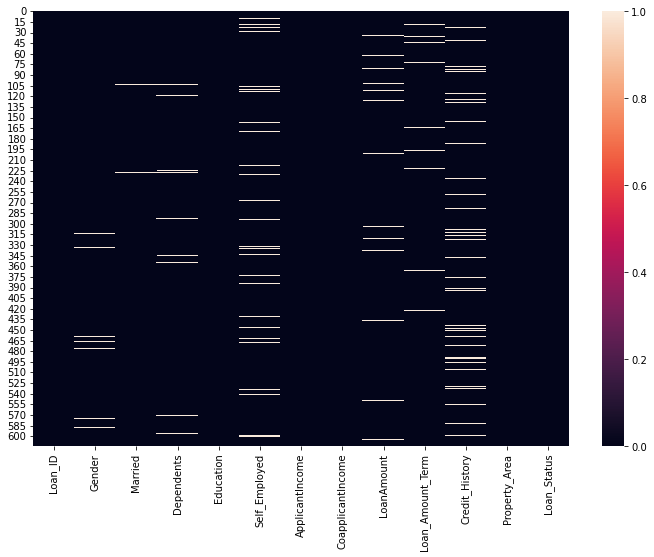

In [106]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_status_data.isnull())

In [107]:
loan_status_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1) Filling Missing values in Gender

In [108]:
loan_status_data["Gender"] = loan_status_data["Gender"].fillna(loan_status_data["Gender"].mode()[0])

2) Filling Missing values in Married

In [109]:
loan_status_data["Married"] = loan_status_data["Married"].fillna(loan_status_data["Married"].mode()[0])

3) Filling Missing values in Dependents

In [110]:
loan_status_data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [111]:
loan_status_data = loan_status_data.replace(to_replace="3+",value=4)

In [112]:
loan_status_data["Dependents"] = loan_status_data["Dependents"].fillna(loan_status_data["Dependents"].mode())

4) Filling Missing values in Self Employed

In [113]:
loan_status_data["Self_Employed"] = loan_status_data["Self_Employed"].fillna(loan_status_data["Self_Employed"].mode()[0])

5) Filling Missing values in Loan Amount

In [114]:
loan_status_data["LoanAmount"] = loan_status_data["LoanAmount"].fillna(loan_status_data["LoanAmount"].mode()[0])

6) Filling Missing values in Loan Amount Term

In [115]:
loan_status_data["Credit_History"] = loan_status_data["Credit_History"].fillna(loan_status_data["Credit_History"].mode()[0])

In [116]:
loan_status_data = loan_status_data.dropna()

In [117]:
loan_status_data["Dependents"].unique()

array(['0', '1', '2', 4], dtype=object)

**7) Droping Duplicates Values of Dataset**

In [118]:
loan_status_data = loan_status_data.drop_duplicates()

**8) Label Encoding**

1) Convert Gender Categorical Value to Numerical Value

In [119]:
loan_status_data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [120]:
loan_status_data["Gender"] = loan_status_data["Gender"].map({"Male":0,"Female":1})

2) Convert Married Categorical Value to Numerical Value

In [121]:
loan_status_data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [122]:
loan_status_data["Married"] = loan_status_data["Married"].map({"No":0,"Yes":1})

3) Convert Education Categorical Value to Numerical Value

In [123]:
loan_status_data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [124]:
loan_status_data["Education"] = loan_status_data["Education"].map({"Graduate":1,"Not Graduate":0})

4) Convert Self Employed Categorical Value to Numerical Value

In [125]:
loan_status_data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [126]:
loan_status_data["Self_Employed"] = loan_status_data["Self_Employed"].map({"No":0,"Yes":1})

5) Convert Property Area Categorical Value to Numerical Value

In [127]:
loan_status_data["Property_Area"] = loan_status_data["Property_Area"].map({"Urban":1,"Rural":2,"Semiurban":3})

6) Convert Loan Status Categorical Value to Numerical Value

In [128]:
loan_status_data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [129]:
loan_status_data["Loan_Status"] = loan_status_data["Loan_Status"].map({"Y":1,"N":0})

In [130]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


# **4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [131]:
loan_status_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.180887,0.651877,0.788396,0.134812,5439.547782,1637.462321,146.501706,341.672355,0.866894,2.063140,0.692833
std,0.385254,0.476782,0.408795,0.341815,6227.712048,2977.957012,85.750747,64.874910,0.339979,0.837848,0.461713
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2873.750000,0.000000,101.250000,360.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3806.000000,1211.500000,126.000000,360.000000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5818.750000,2281.000000,166.750000,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


**2) Analysis a Target Count**

In [132]:
loan_status_data.Loan_Status.value_counts()

1    406
0    180
Name: Loan_Status, dtype: int64

**3) Visualization of Target Count Plot**

Text(0.5, 1.0, 'Counts of Loan Status')

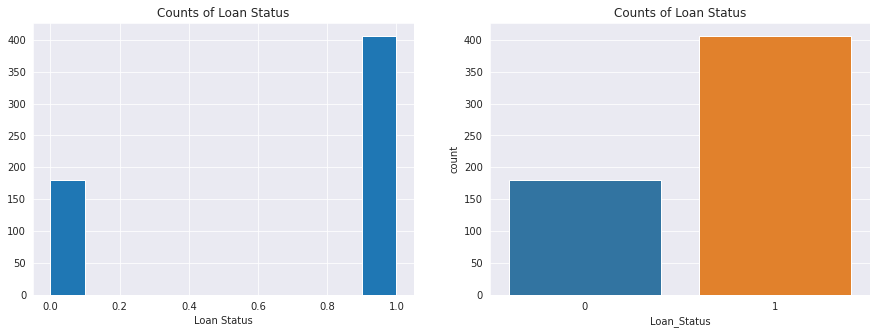

In [133]:
plt.figure(figsize=(15, 5))

sns.set_style('darkgrid')

plt.subplot(1, 2, 1)
plt.hist(loan_status_data.Loan_Status)

plt.title("Counts of Loan Status")
plt.xlabel("Loan Status")


plt.subplot(1, 2, 2)

sns.countplot('Loan_Status', data = loan_status_data)
plt.title("Counts of Loan Status")

In [134]:
import plotly.express as px
plt.figure(figsize=(7, 12))
px.histogram(loan_status_data, x="Loan_Status")

<Figure size 504x864 with 0 Axes>

**4) Visualization Pair Plot of Some Features**

In [135]:
loan_status_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

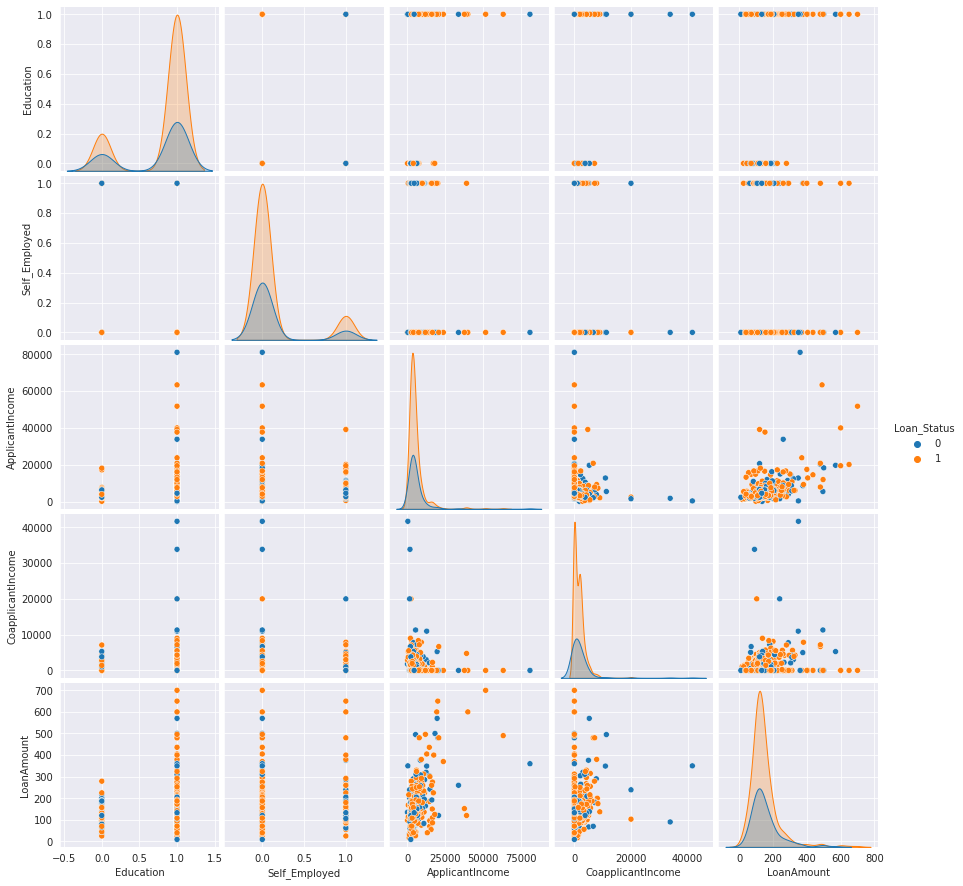

In [136]:
cols = ["Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Status"]
sns.pairplot(loan_status_data[cols], hue="Loan_Status")
plt.show()

**5) Visualization of Correlation**

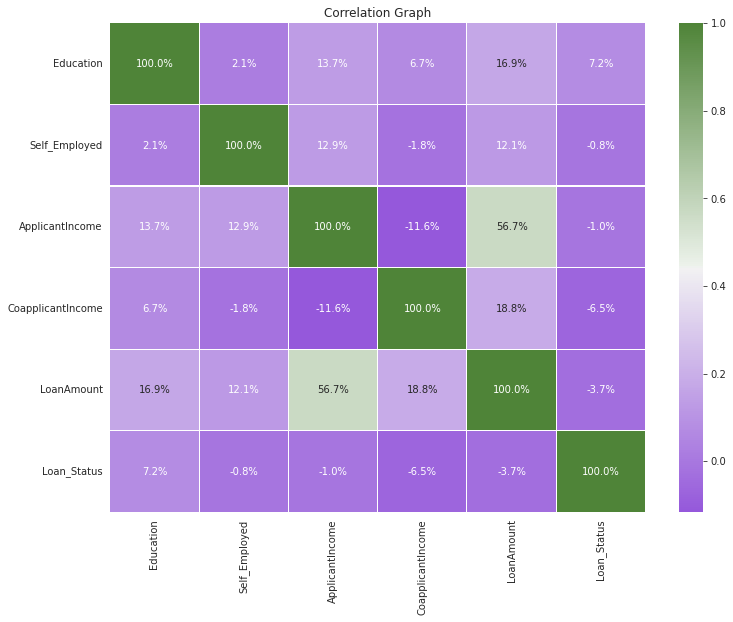

In [137]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(loan_status_data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap)

# **5) Train and Test Split**

In [141]:
del loan_status_data["Loan_ID"]

In [142]:
X = loan_status_data.drop(columns="Loan_Status",axis=1)
y = loan_status_data["Loan_Status"]

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

# **6) Feature Scaling**

**Feature Scaling** is a Techique to Standardize the Independent Features Present in the data in a Fixed Range.

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.47566478,  0.76101031,  0.94364475, ...,  0.29370082,
         0.37054784, -1.32989687],
       [-0.47566478,  0.76101031,  0.12817222, ...,  0.29370082,
         0.37054784, -1.32989687],
       [-0.47566478,  0.76101031,  0.12817222, ...,  0.29370082,
         0.37054784, -1.32989687],
       ...,
       [-0.47566478, -1.31404265, -0.68730031, ...,  0.29370082,
         0.37054784, -0.11612405],
       [-0.47566478,  0.76101031, -0.68730031, ...,  0.29370082,
         0.37054784,  1.09764877],
       [-0.47566478,  0.76101031, -0.68730031, ...,  0.29370082,
         0.37054784, -0.11612405]])

# **7) Build a Model**

**1) Decision Tree Classifier**

In [167]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

**Reducing Overfitting using Cross Validation Scores**

In [171]:
from sklearn.model_selection import cross_val_score

for depth in range(1,16):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, tree.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7904328018223234  Cross val score :  0.7903805496828753
Depth  :  2  Training Accuracy :  0.7904328018223234  Cross val score :  0.7744714587737842
Depth  :  3  Training Accuracy :  0.7904328018223234  Cross val score :  0.7699260042283298
Depth  :  4  Training Accuracy :  0.7904328018223234  Cross val score :  0.7562896405919661
Depth  :  5  Training Accuracy :  0.7904328018223234  Cross val score :  0.7654334038054967
Depth  :  6  Training Accuracy :  0.7904328018223234  Cross val score :  0.7586152219873149
Depth  :  7  Training Accuracy :  0.7904328018223234  Cross val score :  0.7311310782241015
Depth  :  8  Training Accuracy :  0.7904328018223234  Cross val score :  0.7289112050739958
Depth  :  9  Training Accuracy :  0.7904328018223234  Cross val score :  0.6810253699788583
Depth  :  10  Training Accuracy :  0.7904328018223234  Cross val score :  0.6582980972515856
Depth  :  11  Training Accuracy :  0.7904328018223234  Cross val score :  0.671

**2) Random Forest Classifier**

In [172]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth=4,max_features="sqrt")
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

**Reducing Overfitting using Cross Validation Scores**

In [169]:
from sklearn.model_selection import cross_val_score

for depth in range(1,16):
  RF = RandomForestClassifier(max_depth=depth)
  RF.fit(X_train, y_train) 
  trainAccuracy = accuracy_score(y_train, RF.predict(X_train)) 
  RF = RandomForestClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7904328018223234  Cross val score :  0.6492071881606766
Depth  :  2  Training Accuracy :  0.7904328018223234  Cross val score :  0.6424418604651163
Depth  :  3  Training Accuracy :  0.7972665148063781  Cross val score :  0.665169133192389
Depth  :  4  Training Accuracy :  0.8018223234624146  Cross val score :  0.6606765327695561
Depth  :  5  Training Accuracy :  0.8086560364464692  Cross val score :  0.6560253699788583
Depth  :  6  Training Accuracy :  0.8200455580865603  Cross val score :  0.6583509513742072
Depth  :  7  Training Accuracy :  0.8382687927107062  Cross val score :  0.6583509513742072
Depth  :  8  Training Accuracy :  0.8656036446469249  Cross val score :  0.6447145877378435
Depth  :  9  Training Accuracy :  0.8952164009111617  Cross val score :  0.6469873150105708
Depth  :  10  Training Accuracy :  0.9339407744874715  Cross val score :  0.6469873150105708
Depth  :  11  Training Accuracy :  0.9544419134396356  Cross val score :  0.6423

# **8) Making Prediction**

**1) Decision Tree Classifier**

In [173]:
tree.predict([[1,1,0,1,0,4583,2358,141.000000,360.0,1.0,2]])

array([1])

**2) Random Forest Classifier**

In [174]:
RF.predict([[1,1,0,1,0,4583,2358,141.000000,360.0,1.0,2]])

array([1])

# **9) Compare Actual and Predicted Scores**

**1) Decision Tree Classifier**

In [175]:
y_pred_DT = tree.predict(X_test)
y_pred_DT

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [176]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_DT})
df

,Actual,Prediction
612,1,1
105,1,1
147,1,1
406,1,1
86,1,1
...,...,...
408,0,0
100,1,1
285,1,1
380,1,1


**2) Random Forest Classifier**

In [177]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [178]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred_RF})
df

,Actual,Prediction
612,1,1
105,1,1
147,1,1
406,1,1
86,1,1
...,...,...
408,0,0
100,1,1
285,1,1
380,1,1


# **10) Evaluation Metrics**

In [179]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

**1) Decision Tree Classifier**

In [180]:
# Accuracy Score
Accuracy_Score = tree.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.8367346938775511


In [181]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_DT)

array([[ 23,  22],
       [  2, 100]])

In [182]:
# f1 score
F1_Score = f1_score(y_test,y_pred_DT)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8928571428571428


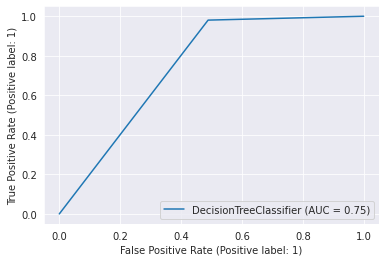

In [183]:
# AUROC Score
plot_roc_curve(tree,X_test,y_test)

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66        45
           1       0.82      0.98      0.89       102

    accuracy                           0.84       147
   macro avg       0.87      0.75      0.77       147
weighted avg       0.85      0.84      0.82       147



**2) Random Forest Classifier**

In [184]:
# Accuracy Score
Accuracy_Score = RF.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.8367346938775511


In [185]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_RF)

array([[ 23,  22],
       [  2, 100]])

In [186]:
# f1 score
F1_Score = f1_score(y_test,y_pred_RF)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.8928571428571428


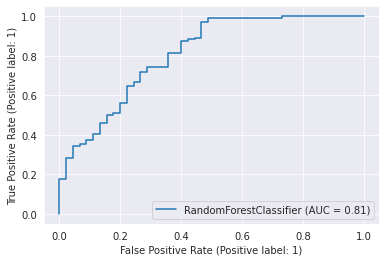

In [187]:
# AUROC Score
plot_roc_curve(RF,X_test,y_test)

In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.51      0.66        45
           1       0.82      0.98      0.89       102

    accuracy                           0.84       147
   macro avg       0.87      0.75      0.77       147
weighted avg       0.85      0.84      0.82       147



# **11) Feature Importances**

**1) Decision Tree Classifier**

In [191]:
# Get numerical feature importances
importances = list(tree.feature_importances_)
# list of tuple with variable and importances
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(X,importances)]
# Sort the feature and importances
feature_importances = sorted(feature_importances, key= lambda X:X[1],reverse = True)
# Print out the Feature of importances
[print("variable: {:20} Importance :{}".format(*pair)) for pair in feature_importances]

variable: Credit_History       Importance :1.0
variable: Gender               Importance :0.0
variable: Married              Importance :0.0
variable: Dependents           Importance :0.0
variable: Education            Importance :0.0
variable: Self_Employed        Importance :0.0
variable: ApplicantIncome      Importance :0.0
variable: CoapplicantIncome    Importance :0.0
variable: LoanAmount           Importance :0.0
variable: Loan_Amount_Term     Importance :0.0
variable: Property_Area        Importance :0.0


[None, None, None, None, None, None, None, None, None, None, None]

**2) Random Forest Classifier**

In [190]:
# Get numerical feature importances
importances = list(RF.feature_importances_)
# list of tuple with variable and importances
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(X,importances)]
# Sort the feature and importances
feature_importances = sorted(feature_importances, key= lambda X:X[1],reverse = True)
# Print out the Feature of importances
[print("variable: {:20} Importance :{}".format(*pair)) for pair in feature_importances]

variable: Credit_History       Importance :0.47
variable: LoanAmount           Importance :0.13
variable: CoapplicantIncome    Importance :0.12
variable: ApplicantIncome      Importance :0.09
variable: Property_Area        Importance :0.05
variable: Loan_Amount_Term     Importance :0.04
variable: Married              Importance :0.03
variable: Dependents           Importance :0.02
variable: Education            Importance :0.02
variable: Gender               Importance :0.01
variable: Self_Employed        Importance :0.01


[None, None, None, None, None, None, None, None, None, None, None]